In [1]:
from keras.models import load_model
from PIL import Image
from IPython.display import display 
import numpy as np
labels = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

/Project/apps/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = load_model('my_model.h5')

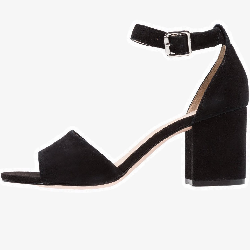

In [3]:
im = Image.open("../test_data/IMG-12.JPG")
size = 250, 250
display(im.resize(size))

In [4]:
im_28 = im.resize((28, 28))
im_28_gr = im_28.convert('L')
display(im_28_gr)

In [5]:
im_28_gr_arr = np.asarray(im_28_gr).astype('float32')
im_28_gr_arr.shape
im_28_gr_arr /= 255
x_test = np.array([im_28_gr_arr.reshape(28, 28, 1)])
x_test.shape

(1, 28, 28, 1)

In [6]:
result = model.predict(x_test)
result.shape

(1, 10)

In [7]:
np.sort(result[0])

array([0.00675878, 0.01338242, 0.03226683, 0.0352823 , 0.0442213 ,
       0.06228392, 0.1243244 , 0.14610866, 0.17350884, 0.36186254],
      dtype=float32)

In [8]:
index = sorted(range(len(result[0])), key=lambda i: result[0][i], reverse=True)[:3]
result[0][index]
for i in index:
    print(labels[i])

Bag
T-shirt/Top
Ankle Boot


In [9]:
result.argmax(axis=-1)

array([8])